In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import sin,cos
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

# P3的一点尾巴
数值计算2D平流格式的Cr数,拒绝手算，真的很烦

正常的二维平流格式的Cr数目 可以看到CR=0.5的时候显著的将两侧区分开来

In [2]:
cr = np.linspace(0,1,100)
kx = np.linspace(0,2*np.pi,50)
g1 = np.empty([100,50])
for ind_cr,cr_part in enumerate(cr):
    for ind_kx,kx_part in enumerate(kx):
        g1[ind_cr,ind_kx] = (2*cr_part - 1)**2 - 4*cr_part*np.cos(kx_part)*(2*cr_part-1) + 4*cr_part**2
# print(g[49],g[50])

(100, 50)


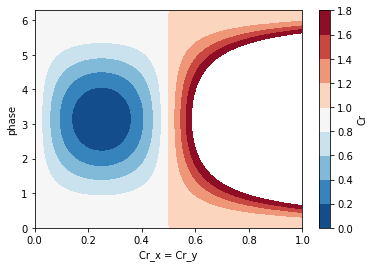

In [3]:
# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(kx,cr)
z = g1
# z = z[:-1, :-1]
print(z.shape)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()
levels = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
# c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=0, vmax=1.5)
c = ax.contourf(x, y, z,levels, cmap='RdBu_r')
# ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
# ax.legend(loc='upper left')
plt.xlabel('Cr_x = Cr_y')
plt.ylabel('phase')
fig.colorbar(c, ax=ax,label='Cr')

fixed二维平流格式的Cr数

In [4]:
g2 = []
cr = []
# cu = 1.
# cv = 1.

# for cu in np.linspace(0,2,10):
for cv in np.linspace(0,2,40):
    cu = cv
    cr.append(cu)   
    lx = np.linspace(0,2*np.pi,50)
    ly = np.linspace(0,2*np.pi,50)

    g2_re = (1-cu)*(1-cv) + cu*(1-cv)*np.cos(lx) + (1-cu)*cv*np.cos(ly) + cu*cv*np.cos(lx) * np.cos(ly) - cu*cv*np.sin(lx)*np.sin(ly)

    g2_cr = -1*cu*(1-cv)*np.sin(lx) - (1-cu)*cv*np.sin(lx) - cu*cv*np.sin(lx)*np.cos(ly) - cu*cv*np.cos(lx)*np.sin(ly)

    g2.append(np.sqrt([g2_re**2 + g2_cr**2]))



(40, 50)


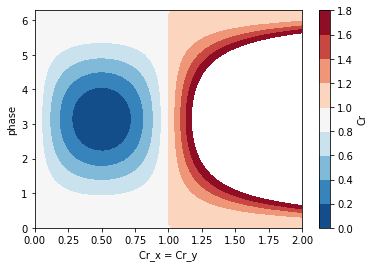

In [5]:
# generate 2 2d grids for the x & y bounds
g2_matrix = np.array(g2)
y, x = np.meshgrid(np.linspace(0,2*np.pi,50),cr)
z = g2_matrix[:,0,:]
# z = z[:-1, :-1]
print(z.shape)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()
levels = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
# c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=0, vmax=1.5)
c = ax.contourf(x, y, z,levels, cmap='RdBu_r')
# ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
# ax.legend(loc='upper left')
plt.xlabel('Cr_x = Cr_y')
plt.ylabel('phase')
fig.colorbar(c, ax=ax,label='Cr')


plt.show()

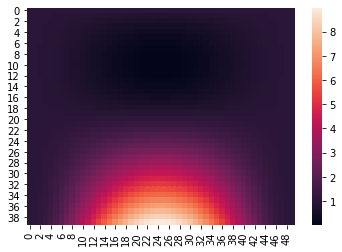

In [6]:
import seaborn as sns
ax = sns.heatmap(g2_matrix[:,0,:], linewidth=0)

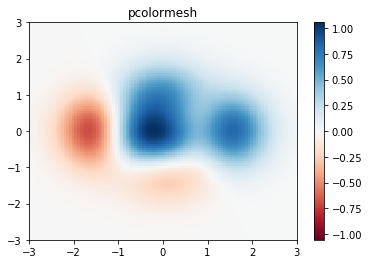

In [7]:
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()